In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('crop_production.csv')

In [4]:
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [5]:
df.tail(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.0
246082,West Bengal,PURULIA,2014,Rabi,Safflower,54.0,37.0
246083,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.0
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.5

Four variables are object(State_Name,District_Name,Season,Crop),one is integer type(crop_year) and the other two are float(Area and Production).

In [7]:
np.unique(df["State_Name"]).shape

(33,)

In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

Production Variable having 3730 missing values. It has 1.5% percent of the total dataset. So we drop the missing values in the dataset because we have a huge dataset.

In [9]:
3730/246091

0.015156994770227274

In [10]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [11]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## State Name Distribution

In [12]:
df.State_Name.nunique()

33

In [13]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [14]:
df.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

On 33 Indian states (including Union Territory), the statistics on agriculture are encoded in this dataset. As can be seen below, we have more data than other states from the top agriculturally productive states like Uttar Pradesh, Madhya Pradesh, and Karnataka.

## District Name Distribution

In [15]:
df.District_Name.nunique()

646

In [16]:
df.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

As can be seen below, we have more data than other district from the top agriculturally productive district like tumkur,belgaum,bijapur.

## Crop Year Distribution


In [17]:
df.Crop_Year.value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

In [18]:
print(df.Crop_Year.nunique())
print(df.Crop_Year.max())
print(df.Crop_Year.min())

19
2015
1997


From 1997 to 2015, our dataset contains data for 19 years. 2003, 2002, 2007–2008, and 2006 are the best years.


## Season Distribution

In [19]:
print(df.Season.nunique())
print(df.Season.unique())
print(df.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


The dataset mentions crops grown during the six seasons of Kharif, Annual, Autumn, Rabi, Summer, and Winter, with Winter seeing the highest crop yields. We have more data points in terms of frequency for crop categories like Kharif, Rabi, and Annual.

## Crop Distribution

In [20]:
print(df.Crop.nunique())
print(df.Crop.unique())
print(df.Crop.value_counts())

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

Dataset includes information about 124 various crop kinds. The top three crops, according to df.value_counts(), are rice (15082), maize (13787), and moong (green gramme, 10106).

## Area Distribution

In [21]:
print(df.Area.max())
print(df.Area.min())
print(df.Area.value_counts())

8580100.0
0.1
1.0         3573
2.0         3140
100.0       2621
3.0         2478
4.0         2182
            ... 
25569.0        1
19349.0        1
90302.0        1
39698.0        1
279151.0       1
Name: Area, Length: 38391, dtype: int64


We have the percentage of land that is being farmed for various states and districts. The portion of land set up for agriculture determines production.

## Production Distribution

In [22]:
print(df.Production.describe())

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64


Range of production values is 0 to 1250800000

## Heat Map

/var/folders/qq/hbj6x6q17xgg18l87sfygp640000gn/T/ipykernel_6008/3048952738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

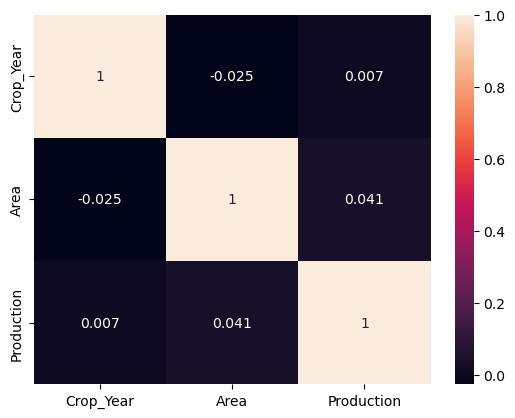

In [23]:
corr = df.corr()
sns.heatmap(corr,annot=True)

No variable in the dataset exhibits a strong association with any other variable.

## State V/s Production analysis

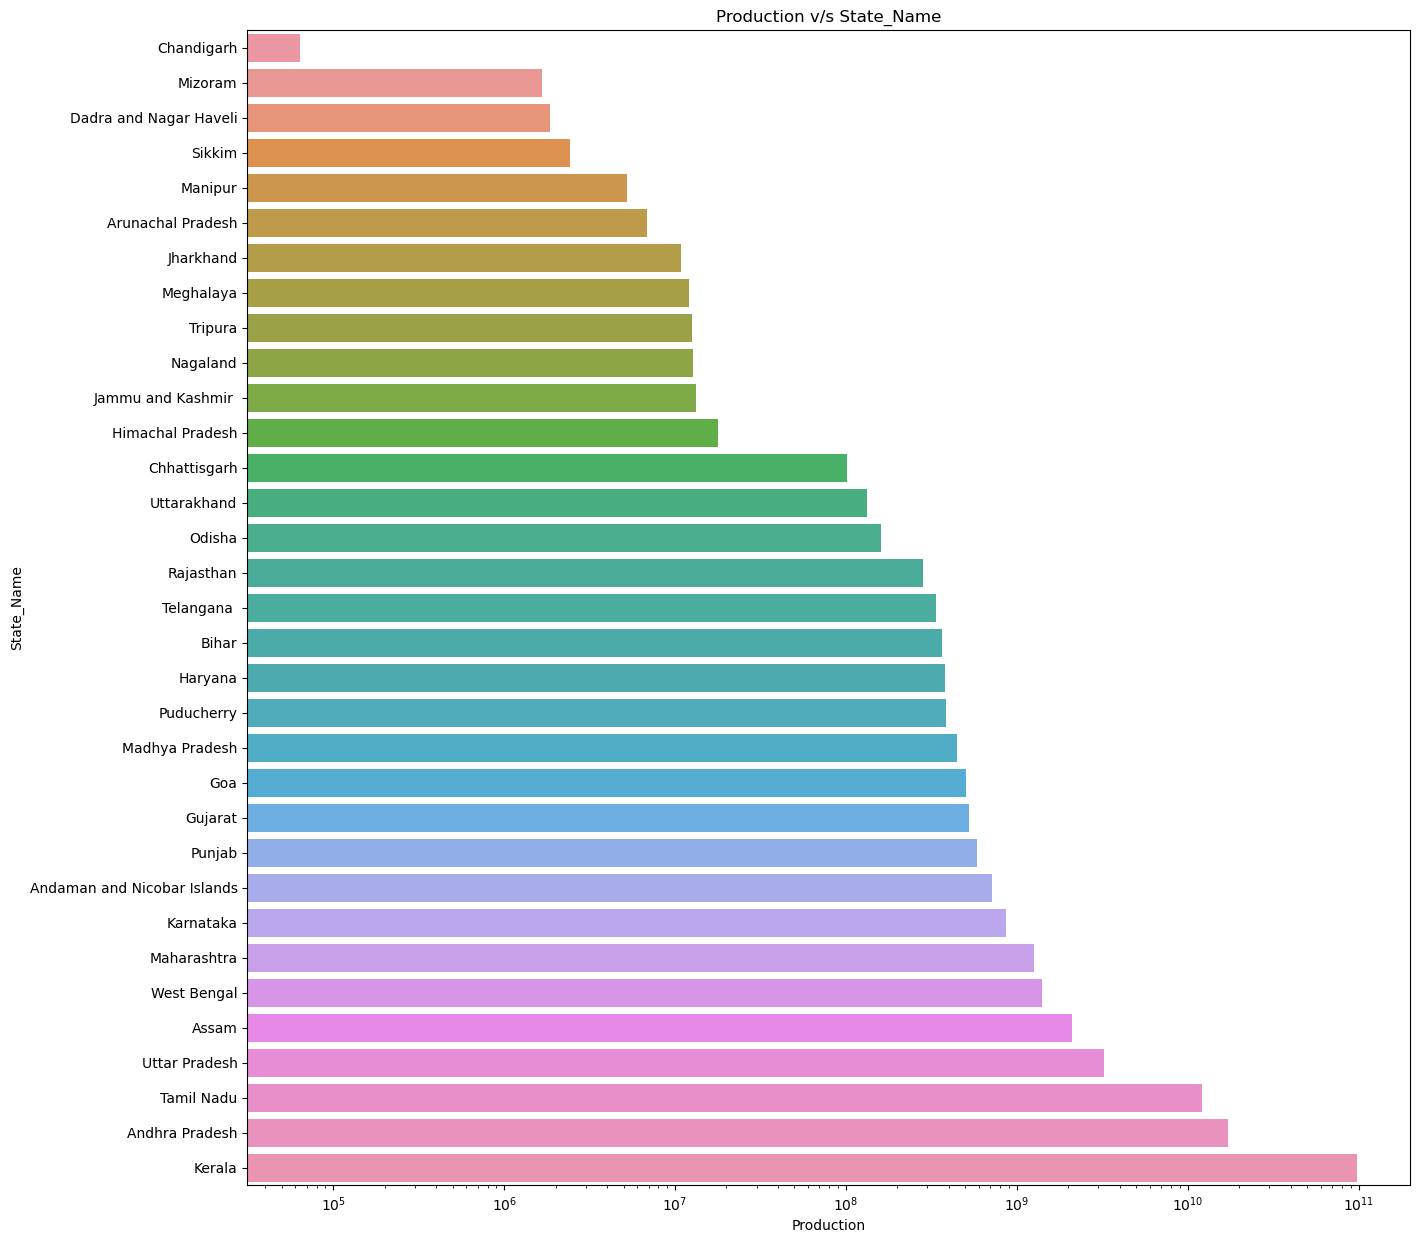

In [24]:
state_analysis = df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
plt.figure(figsize= (15,15))
plt.xscale('log')
sns.barplot(x='Production', y='State_Name', data=state_analysis,orient='h')
plt.title('Production v/s State_Name')
plt.show();

When we consider the amount of production over the past 19 years, Kerala is the top state.

## State v/s Area analysis

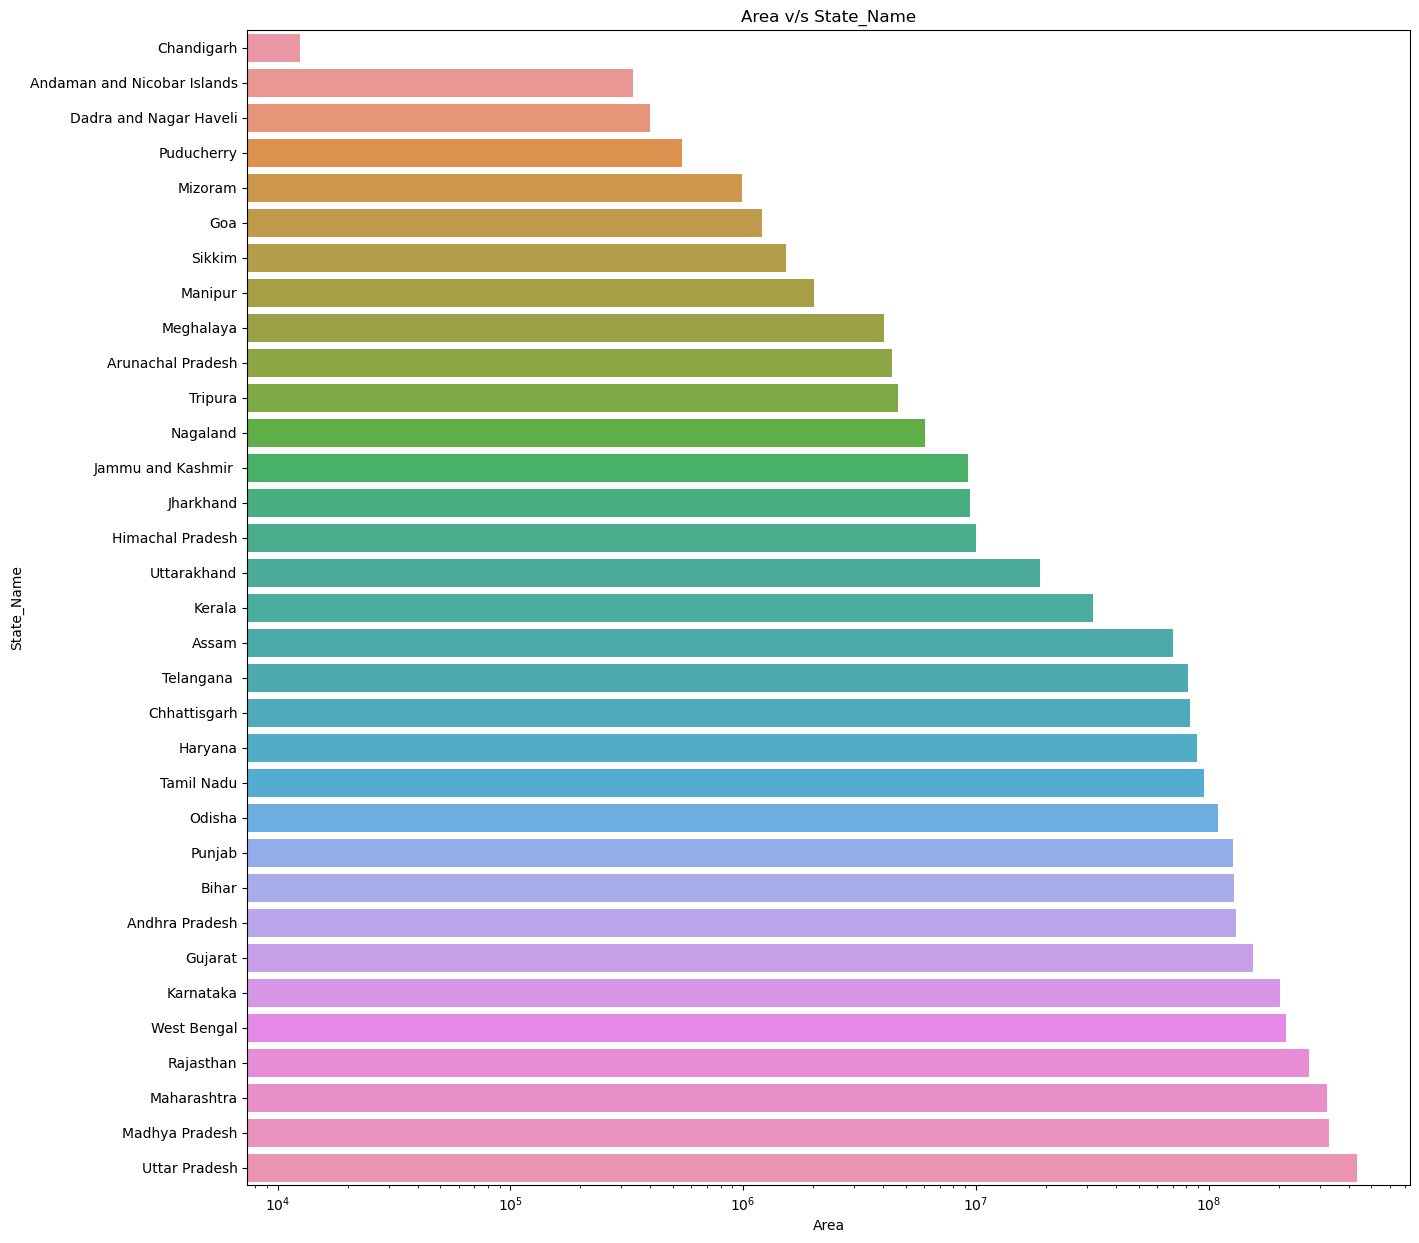

In [25]:
state_analysis_area_wise = df.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area')
plt.figure(figsize= (15,15))
plt.xscale('log')
sns.barplot(x='Area', y='State_Name', data=state_analysis_area_wise,orient='h')
plt.title('Area v/s State_Name')
plt.show();

Uttar Pradesh has the largest area.

## State v/s Production per unit area

/var/folders/qq/hbj6x6q17xgg18l87sfygp640000gn/T/ipykernel_6008/2277762362.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_analysis_area=df.groupby(by='State_Name')['Area','Production'].sum().reset_index()


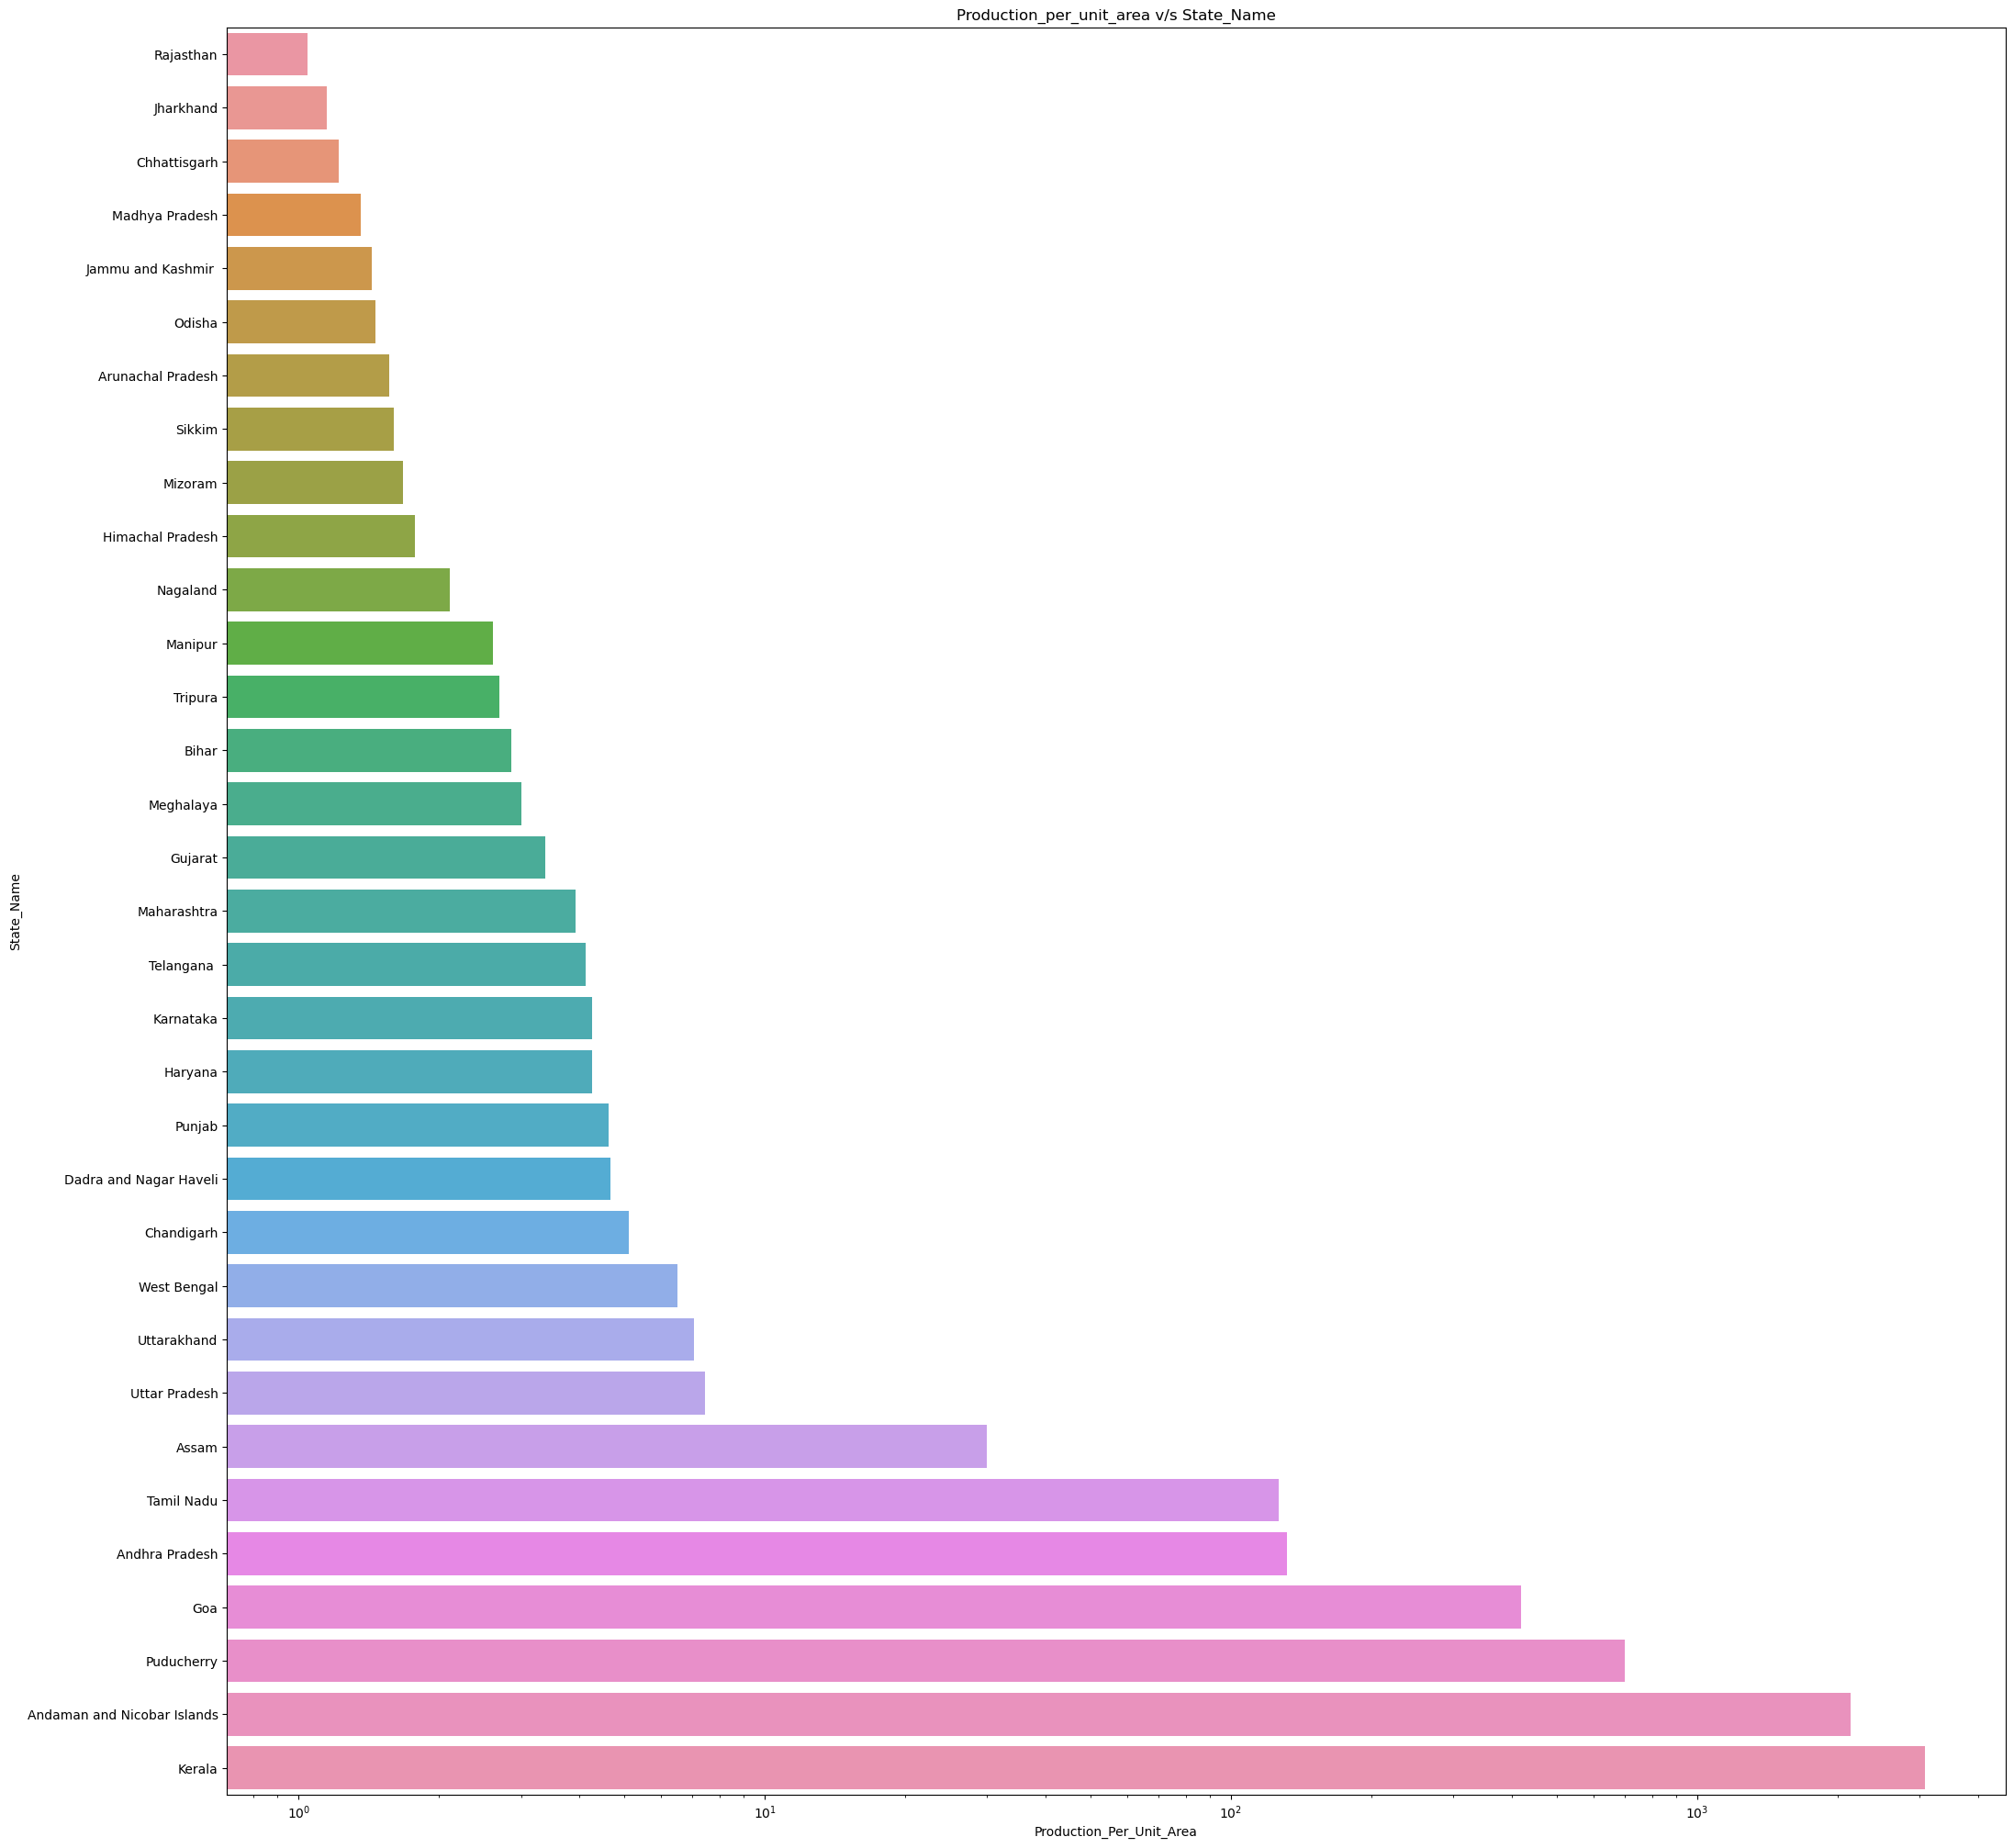

In [26]:
state_analysis_area=df.groupby(by='State_Name')['Area','Production'].sum().reset_index()
state_analysis_area['Production_Per_Unit_Area'] = state_analysis_area['Production']/state_analysis_area['Area']
state_analysis_area = state_analysis_area.sort_values(by='Production_Per_Unit_Area')
plt.figure(figsize= (25,25))
plt.xscale('log')
plt.title('Production_per_unit_area v/s State_Name')
sns.barplot(x='Production_Per_Unit_Area', y='State_Name', data=state_analysis_area,orient='h')
plt.show();

If we find production per unit area then again kerala is the highest producing state


## Crop_Year v/s Production

Text(0.5, 1.0, 'Crop_year v/s Production')

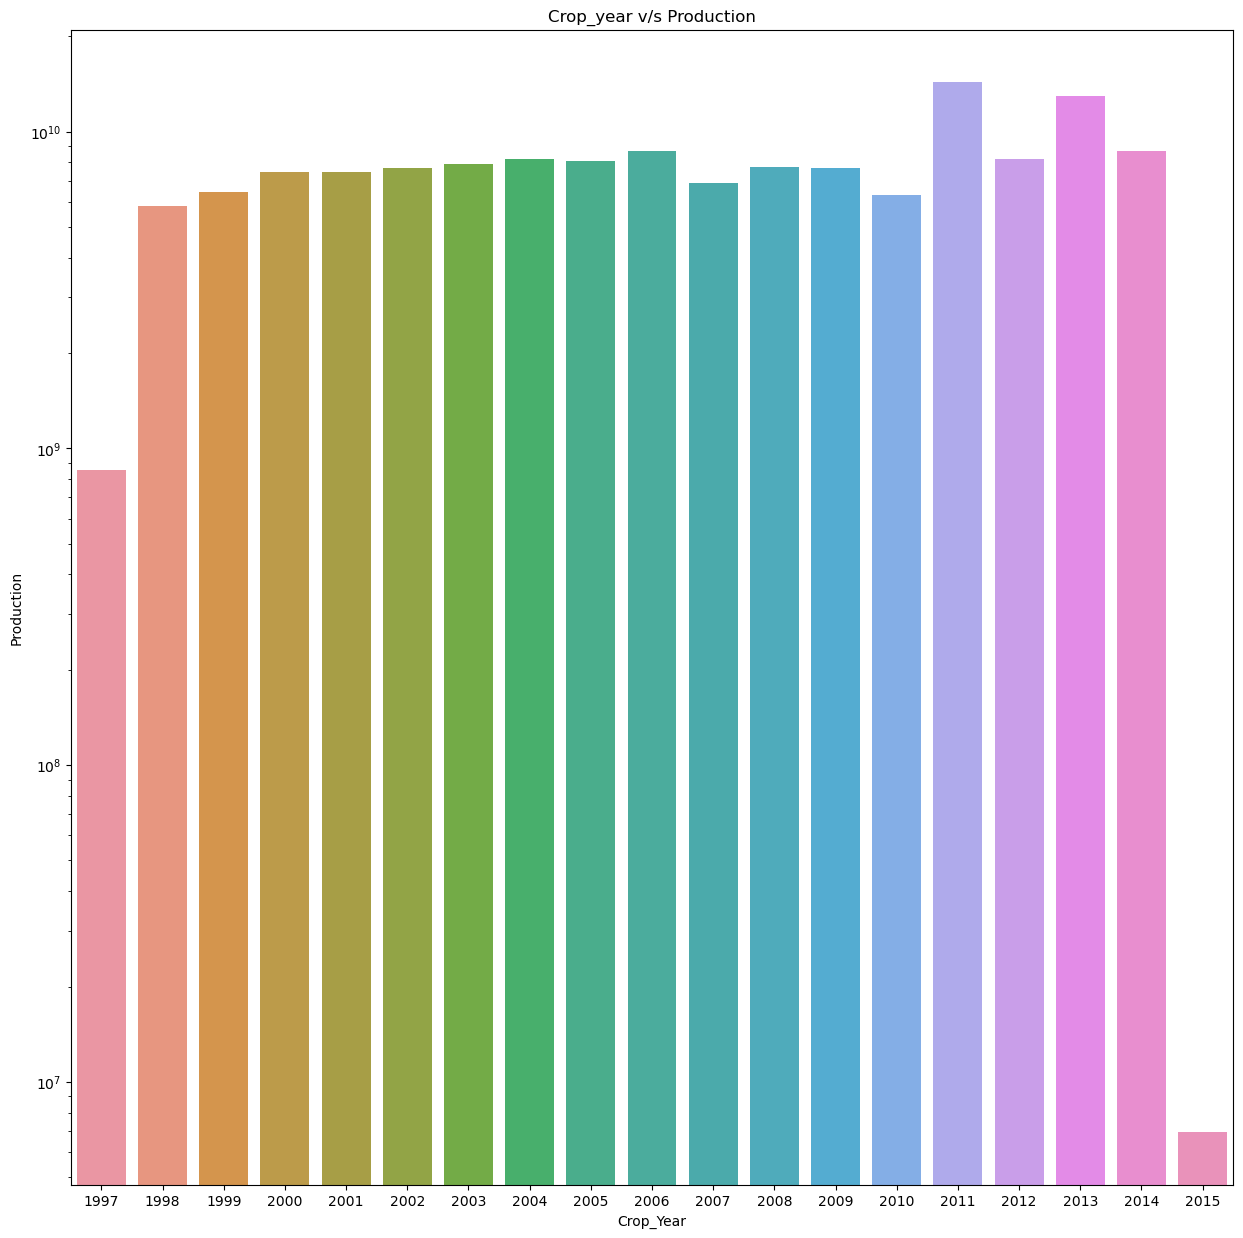

In [27]:
year_analysis=df.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production')
plt.figure(figsize= (15,15))
plt.yscale('log')
sns.barplot(x='Crop_Year', y='Production', data=year_analysis)
plt.title('Crop_year v/s Production')

High productive years are 2011, 2013 and 2014.

## Season v/s Production

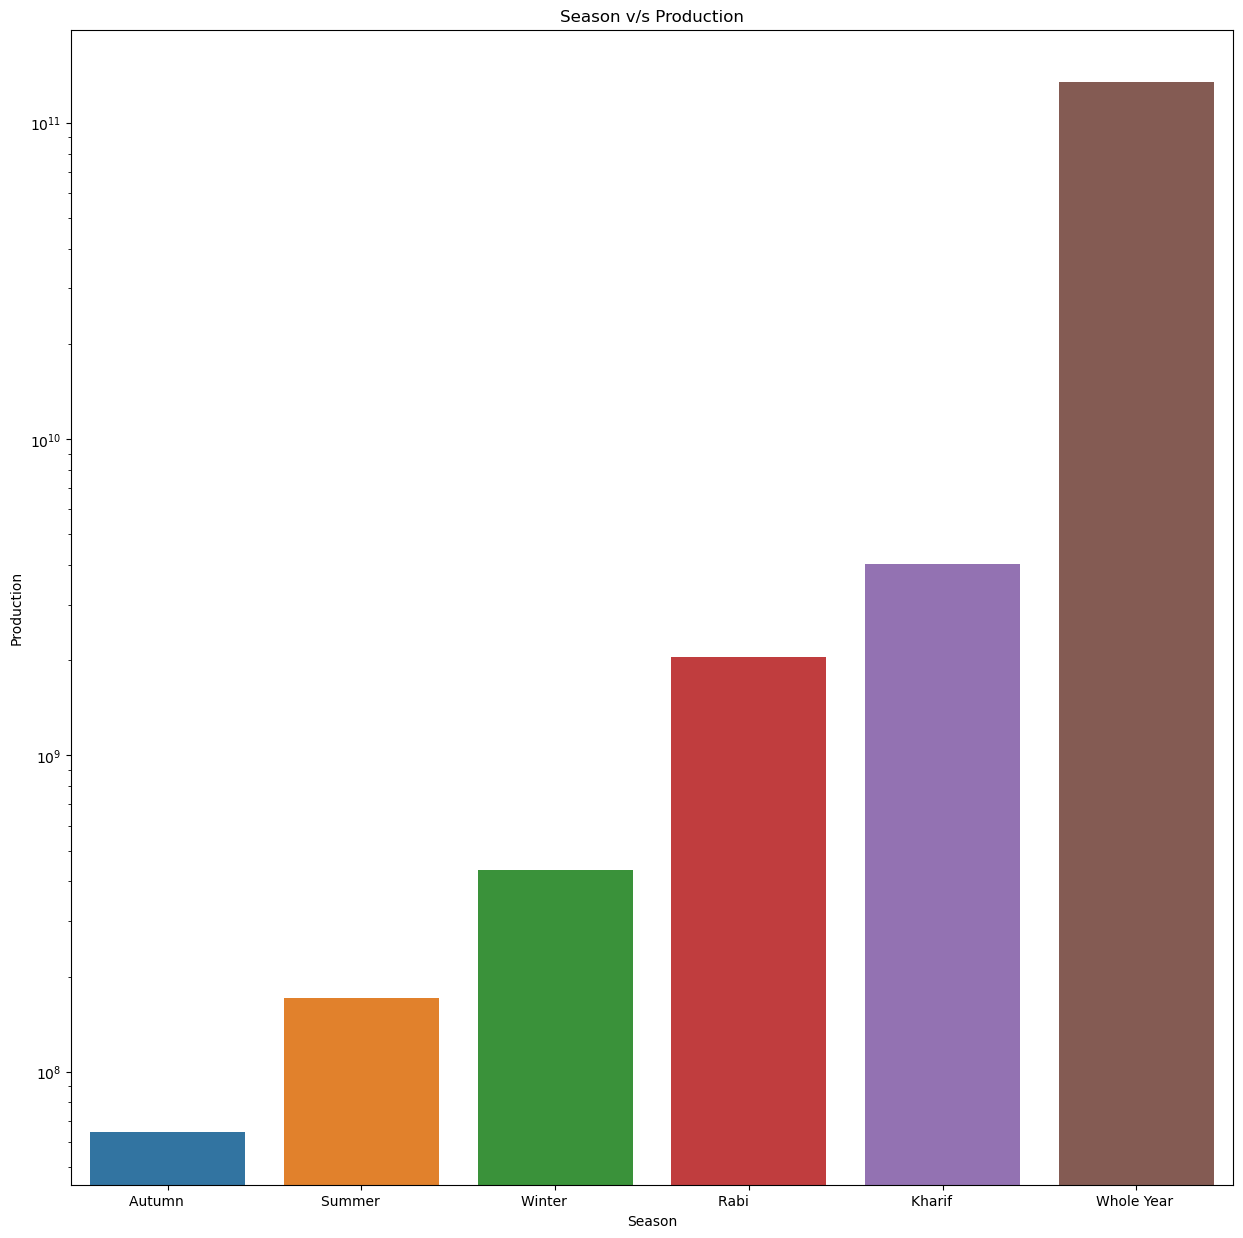

In [28]:
season_analysis=df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production')
plt.figure(figsize= (15,15))
plt.yscale('log')
sns.barplot(x='Season', y='Production', data=season_analysis)
plt.title('Season v/s Production')
plt.show();

Whole Year (annual growing plants), Kharif, and Rabi crops are the top crop types with the highest production values. It is evident that these crops are very reliant on seasonal monsoons.

## Production v/s Crop

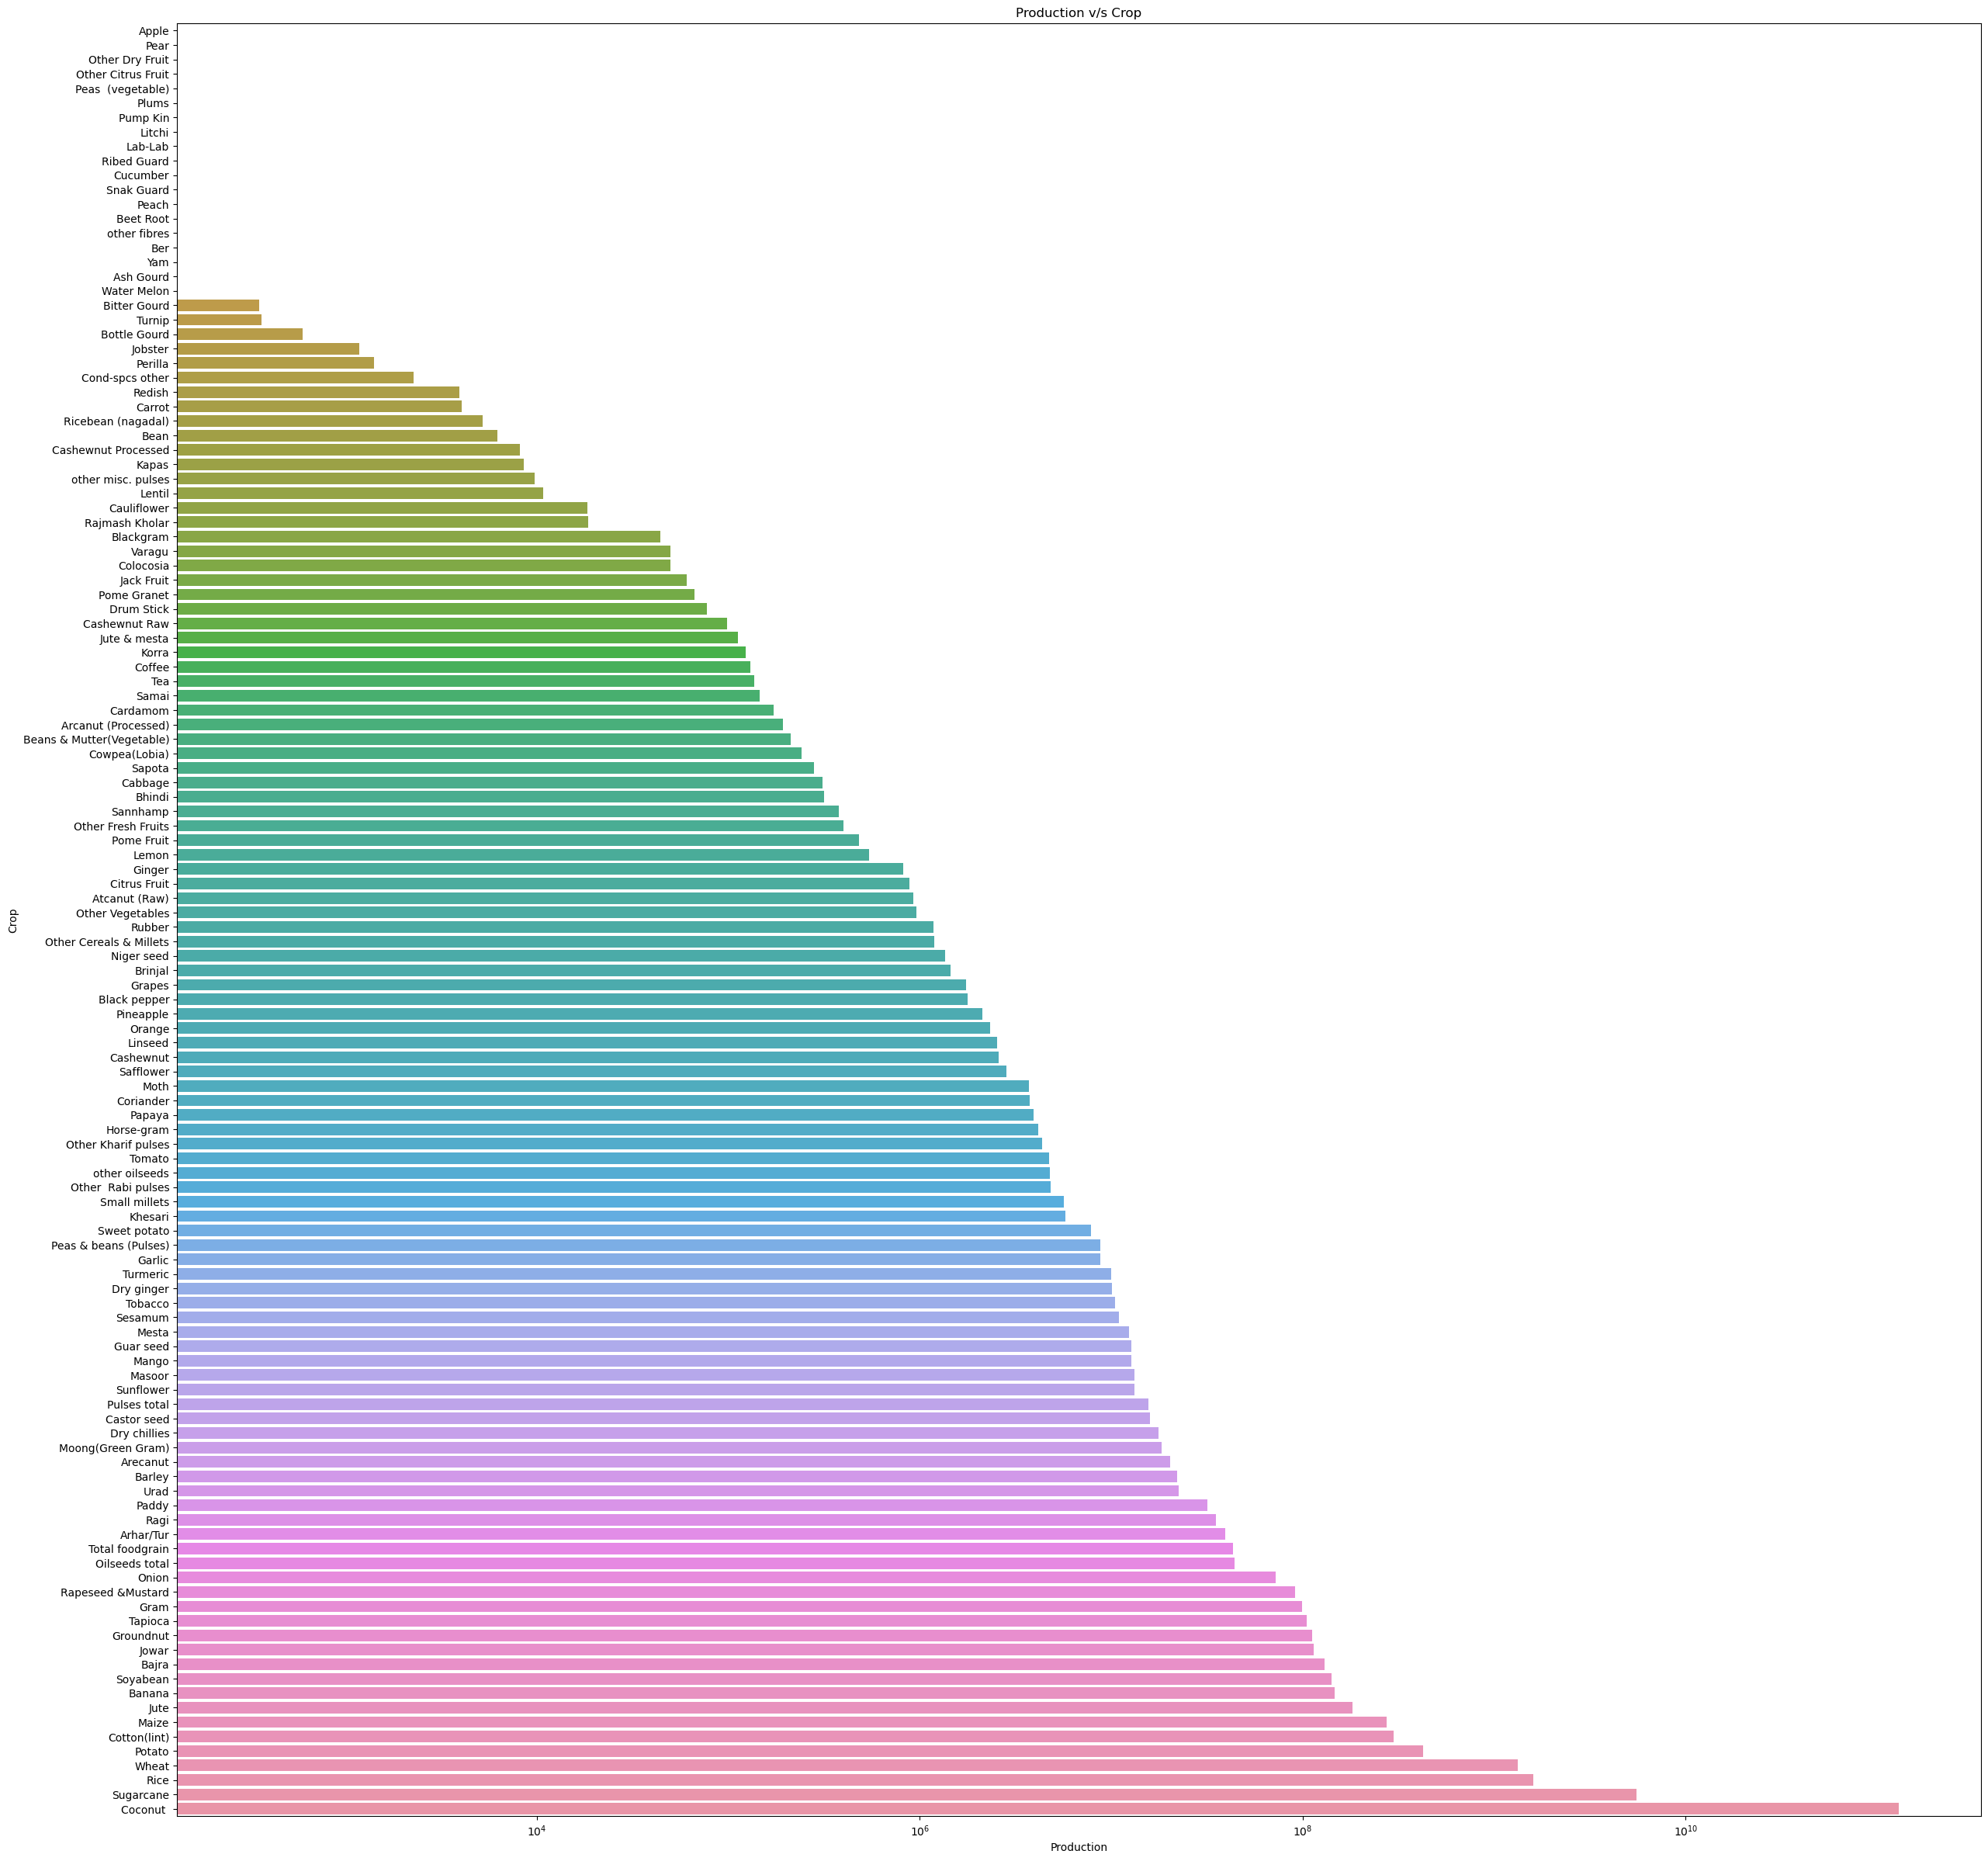

In [29]:
crop_analysis=df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
plt.figure(figsize= (30,30))
plt.xscale('log')
sns.barplot(x='Production', y='Crop', data=crop_analysis,orient='h')
plt.title('Production v/s Crop')
plt.show();

Top Crops Production wise are: Coconut, Sugarcane and Rice and we have zero crops production of apple,pear,other dry fruit, other citrus fruit,Peas(vegetables),Plums, Pumpkins, Litchi, Lab-lab, Ribed Guard, snake Guard, Cucumber, Peach, Beetroot, other fibres, ber, yam, ash guard, watermelon

## Production per unit area v/s Crop

/var/folders/qq/hbj6x6q17xgg18l87sfygp640000gn/T/ipykernel_6008/1178105065.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crop_analysis_area=df.groupby(by='Crop')['Area','Production'].sum().reset_index()


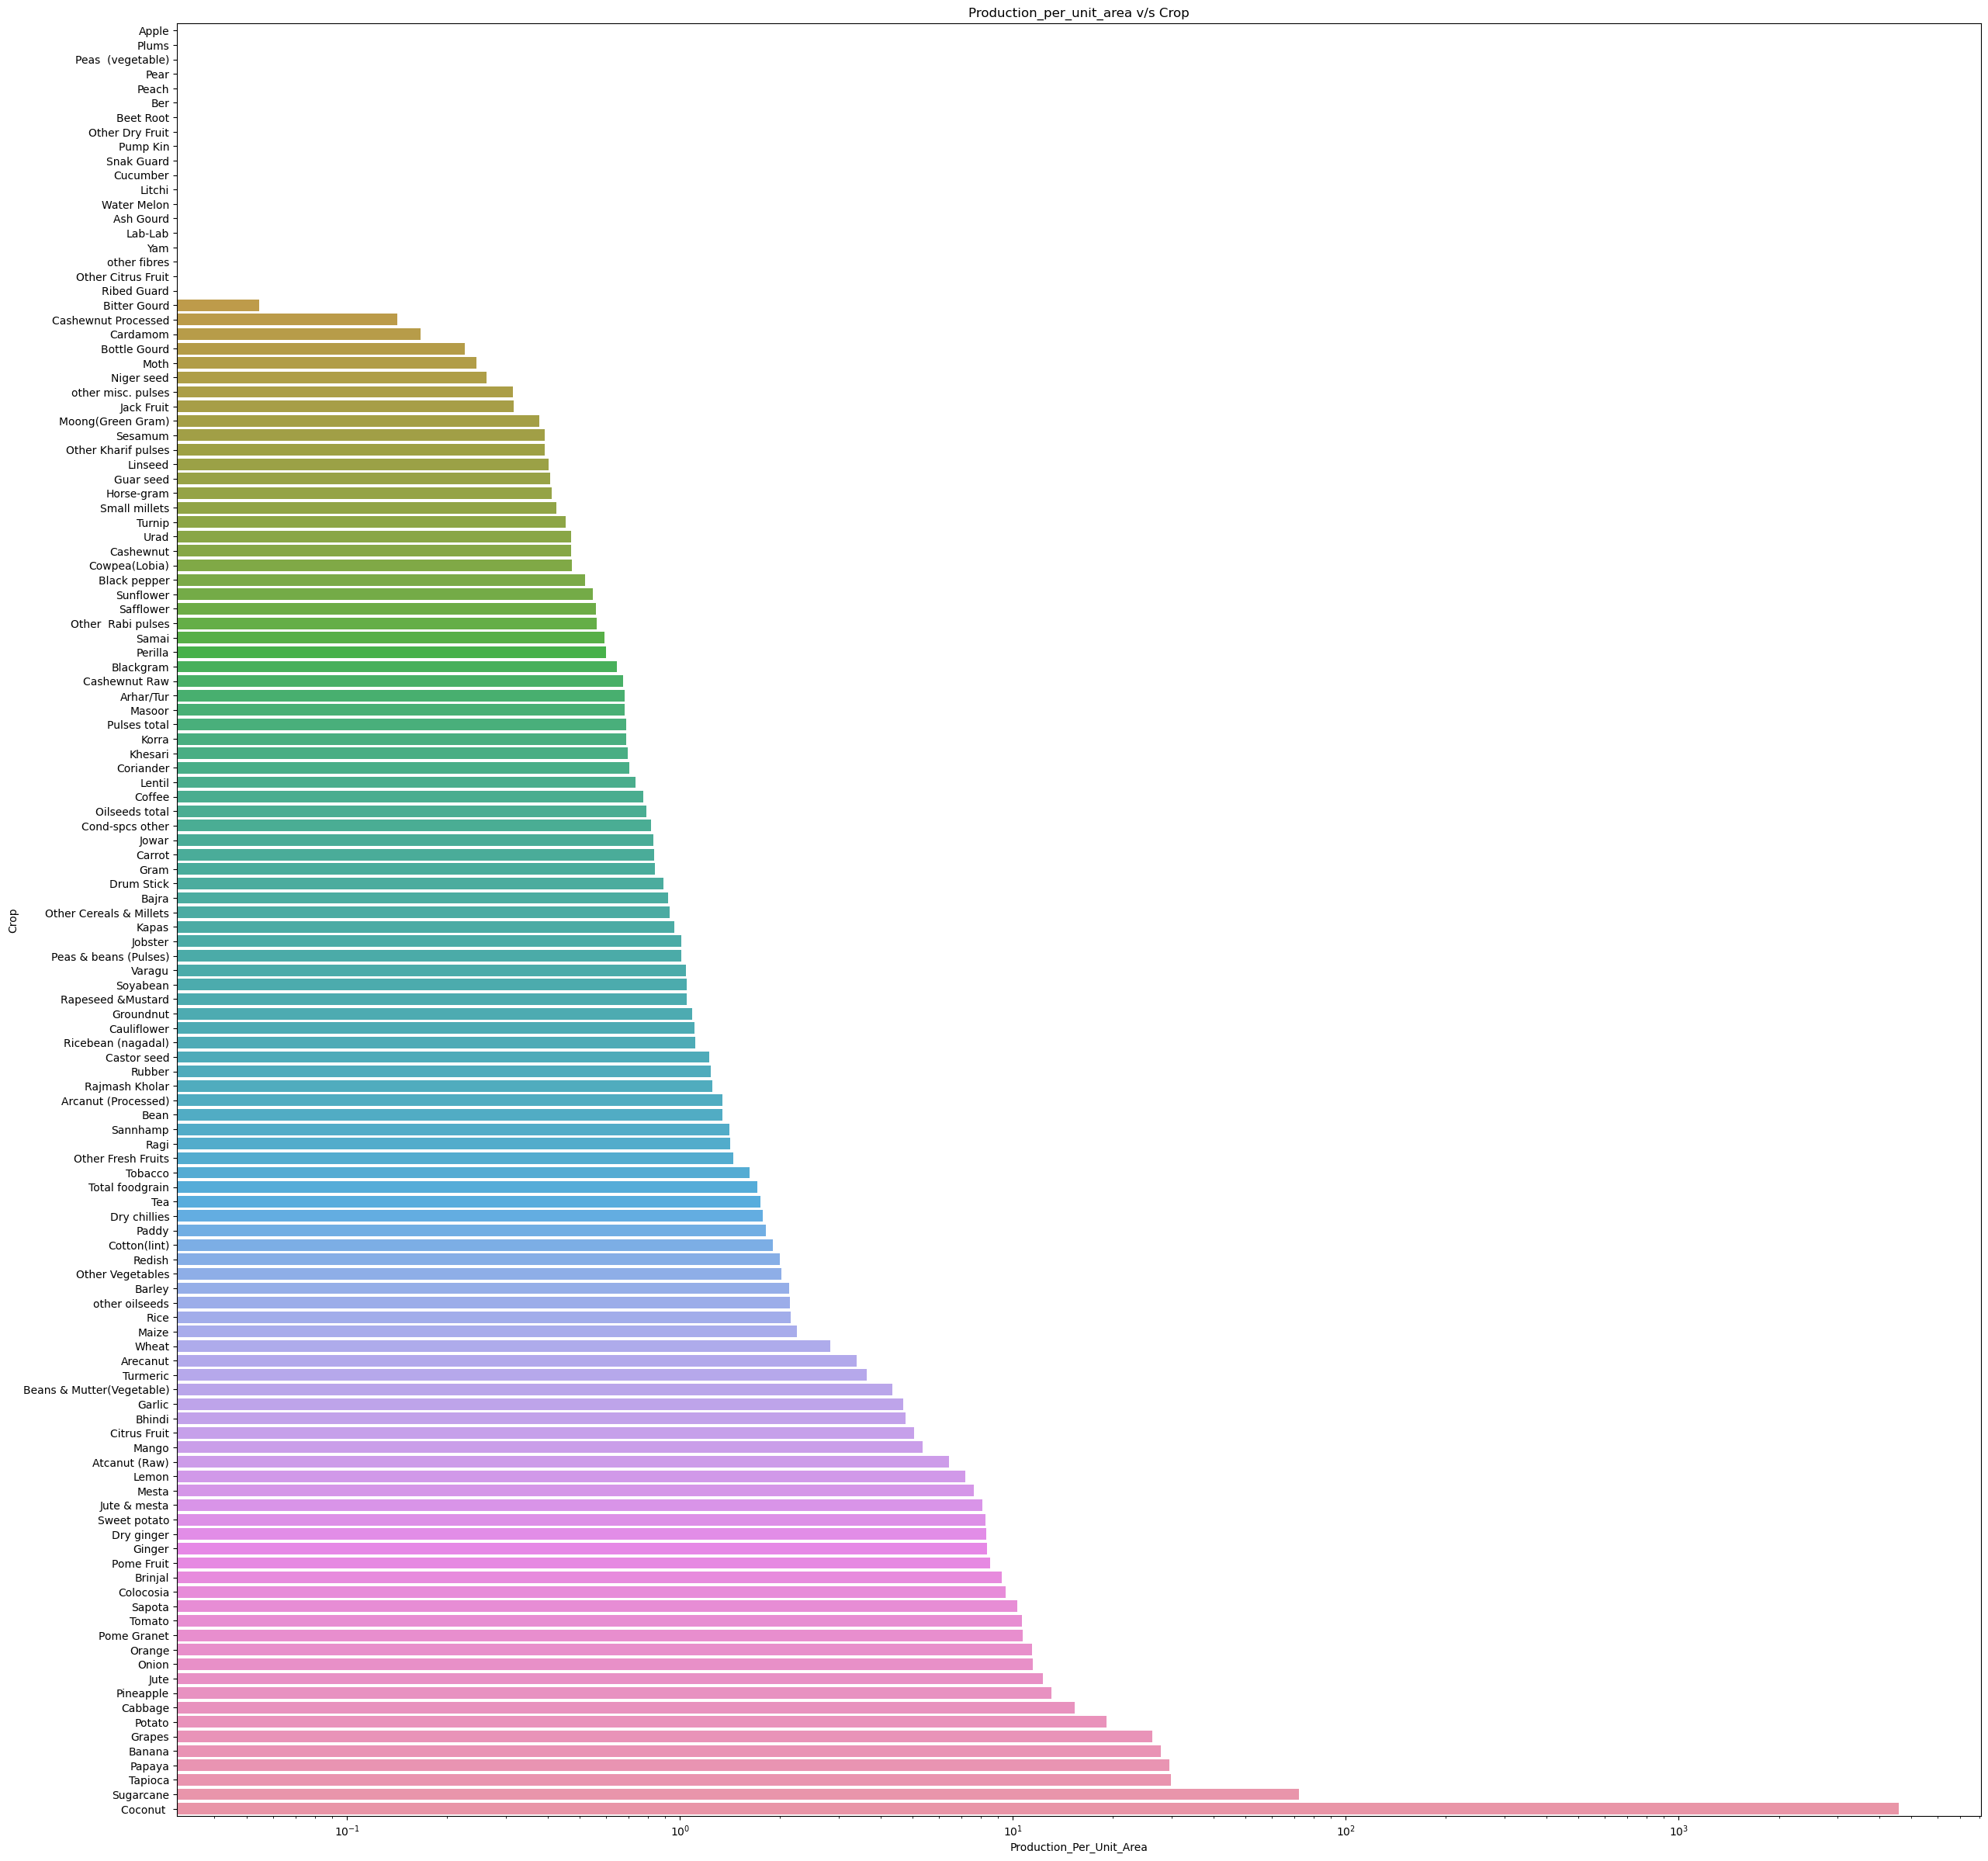

In [30]:
crop_analysis_area=df.groupby(by='Crop')['Area','Production'].sum().reset_index()
crop_analysis_area['Production_Per_Unit_Area'] = crop_analysis_area['Production']/crop_analysis_area['Area']
crop_analysis_area = crop_analysis_area.sort_values(by='Production_Per_Unit_Area')
plt.figure(figsize= (30,30))
plt.xscale('log')
plt.title('Production_per_unit_area v/s Crop')
sns.barplot(x='Production_Per_Unit_Area', y='Crop', data=crop_analysis_area,orient='h')
plt.show();

Top Crops Production per unit area wise are: Coconut, Sugarcane and Tapioca